In [1]:
import pandas as pd
import numpy as np
import fs_qe as fq

%matplotlib inline

Here we show the total asset variable for all qualified Japanese firms in Orbis from 2010 to 2019.
- Total number of qualified Japanese firms with the total asset variable in Orbis: $343,632$,
- All values of the total assets are measured in US $\$000$.

# 1. Pre-processing the data

## 1.1 Pre-pre-processing the data

In [4]:
df_jp1 = fq.import_data(file='data/jp1.csv')
df_jp2 = fq.import_data(file='data/jp2.csv')
df_jp3 = fq.import_data(file='data/jp3.csv')
df_jp4 = fq.import_data(file='data/jp4.csv')


In [5]:
df_x1 = df_jp1.append(df_jp2, ignore_index=True)
df_x2 = df_x1.append(df_jp3, ignore_index=True)
df_x3 = df_x2.append(df_jp4, ignore_index=True)
df_x3

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"358,693,205","373,109,737","376,880,705","402,892,314","397,384,321","421,092,025","435,075,307","473,756,915","468,237,931","484,640,642"
1,n.a.,n.a.,"153,400,777","153,592,203","139,388,948","132,888,131","140,450,346","151,379,322","150,168,051",n.a.
2,"139,190,112","143,405,465","144,825,890","156,037,322","153,408,020","161,851,133","169,193,430","182,212,668","184,088,739","188,237,955"
3,"136,502,370","153,238,137","153,060,707","154,605,013","139,658,366","132,435,899","140,594,000","151,021,643","149,051,575","166,050,245"
4,"3,523,794,228",n.a.,n.a.,"2,841,482,264","2,463,157,097","2,592,089,730","2,616,354,823","2,736,982,216","2,579,974,049","2,632,000,541"
...,...,...,...,...,...,...,...,...,...,...
343627,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,"1,006","1,531",n.a.
343628,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,734,702,n.a.
343629,n.a.,n.a.,n.a.,n.a.,n.a.,"87,034","78,553","174,459","135,162","193,374"
343630,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,"8,138","32,162",n.a.


In [6]:
df_x3.index += 1
df_x3.index.name='id'
df_x3

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
id,,,,,,,,,,
1,"358,693,205","373,109,737","376,880,705","402,892,314","397,384,321","421,092,025","435,075,307","473,756,915","468,237,931","484,640,642"
2,n.a.,n.a.,"153,400,777","153,592,203","139,388,948","132,888,131","140,450,346","151,379,322","150,168,051",n.a.
3,"139,190,112","143,405,465","144,825,890","156,037,322","153,408,020","161,851,133","169,193,430","182,212,668","184,088,739","188,237,955"
4,"136,502,370","153,238,137","153,060,707","154,605,013","139,658,366","132,435,899","140,594,000","151,021,643","149,051,575","166,050,245"
5,"3,523,794,228",n.a.,n.a.,"2,841,482,264","2,463,157,097","2,592,089,730","2,616,354,823","2,736,982,216","2,579,974,049","2,632,000,541"
...,...,...,...,...,...,...,...,...,...,...
343628,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,"1,006","1,531",n.a.
343629,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,734,702,n.a.
343630,n.a.,n.a.,n.a.,n.a.,n.a.,"87,034","78,553","174,459","135,162","193,374"


## 1.2 Pre-processing the data

In [7]:
df1 = df_x3
df4 = fq.preprocessdata(df1)

# 2 the firm-growth as $\ln (S_+) - \ln (S) $ against firm size $S$ or log firm size $\ln S$

In [8]:
df6 = fq.preprocess_data0(df4)

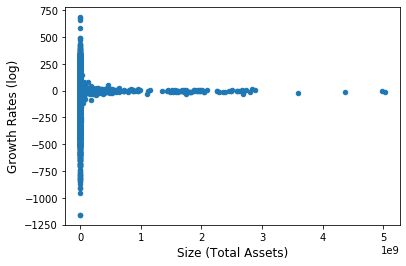

In [9]:
fq.scatterplot(df6)

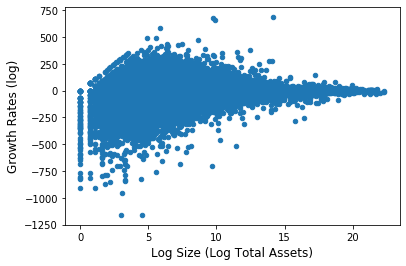

In [10]:
fq.scatterplot(df6, x='logtasset', xlabel='Log Size (Log Total Assets)')

# 3 generating plots with a $45$-degree line

## 3.1 Process data

In [11]:
df8 = fq.process45line(df4)

## 3.2 Scatter Plots with Linear Regression Approximation (with 45 degree line)

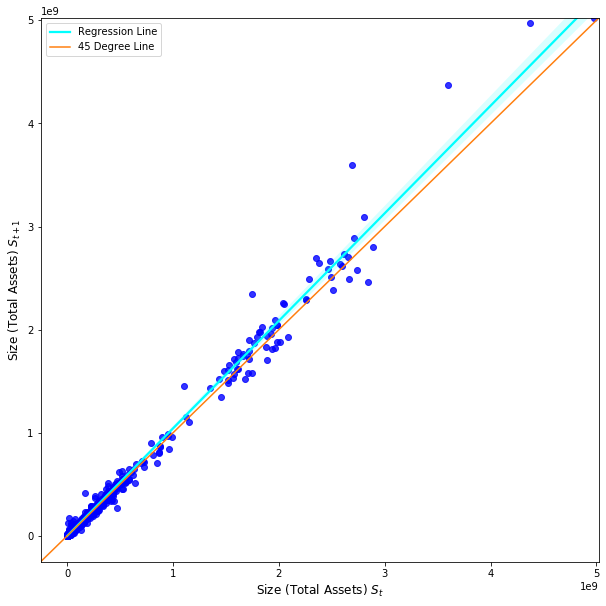

In [12]:
fq.plots(df8, reg=True)

## 3.3 Scatter Plots with 3rd-Degree Polynomial Approximation (with 45 degree line)

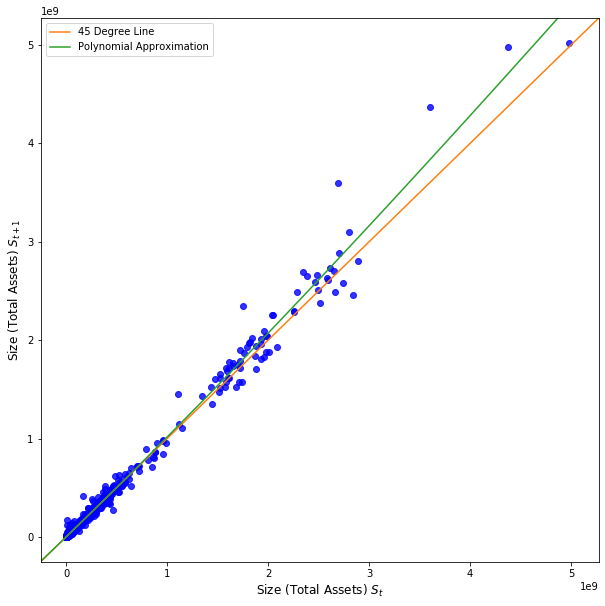

In [13]:
fq.plots(df8)